In [2]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cv2

In [4]:
vidcap = cv2.VideoCapture('bad_apple.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("./images/frame%d.jpg" % count, image)     
  success,image = vidcap.read()
  count += 1

In [5]:
frames = []
for i in range(6570):
    image = plt.imread("images/frame" + str(i) + ".jpg")
    frames.append(image)

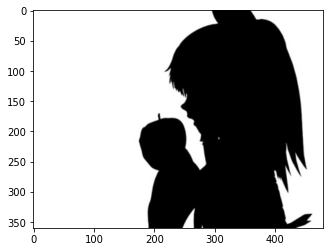

In [6]:
img = frames[300]
plt.imshow(img)

In [7]:
# should take about 12 mins to run
def color_diff(p1, p2):
    return np.sum((p1-p2)**2)

def edginess(img, x, y):
    center = img[y, x]
    l = img[y, x-1]
    r = img[y, x-1]
    t = img[y+1, x]
    b = img[y-1, x]
    # original video used here is in black&white so this trick works
    if l[0] == r[0] and r[0] == t[0] and t[0] == b[0]:
        return 0
    else:
        left = color_diff(center, l)
        right =color_diff(center, r)
        top =color_diff(center, t)
        bottom =color_diff(center,b)
        return max(left, right, top, bottom)
        

def edge(img):
    ny, nx, _ = img.shape
    ret = np.zeros((ny, nx))
    for y in range(ny-1):
        for x in range(1, nx-1):
            ret[y, x] = edginess(img, x, y)
    return ret

e_ani = []
for i in range(0, len(frames[:])-1, 6):
    img = frames[i]
    e_ani.append(edge(img))

len(e_ani)

1095

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit'] = 2**128
plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    plt.cla()
    plt.imshow(e_ani[t])
    
FuncAnimation(fig, animate, frames=1095)